Dataset preview:
   age  income  bought
0   22   35000       0
1   25   40000       0
2   47   90000       1
3   52  110000       1
4   46   95000       1
    age  income
0    22   35000
1    25   40000
2    47   90000
3    52  110000
4    46   95000
5    56  130000
6    23   36000
7    27   42000
8    48  100000
9    53  115000
10   58   95725
11   48  114654
12   34   65773
13   27   97435
14   40   86886
15   58   96803
16   38   61551
17   42   41394
18   30   99092
19   30   33890
20   43   71606
21   55  126276
22   59  110038
23   43  117313
24   22   40627
25   41   38792
26   21  138859
27   43  138557
28   49  103969
29   57   73001
30   21  106552
31   40   53897
32   52   98148
33   31   53483
34   41   78555
35   44   47159
36   46  136530
37   47  110077
38   35   65920
39   34  122067
Predictions on test set: [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
Accuracy: 0.8571428571428571


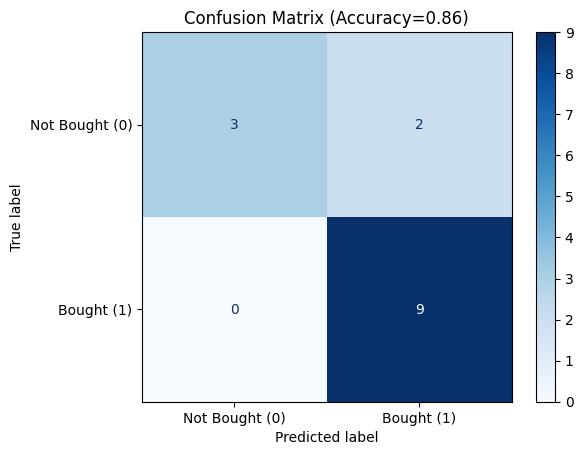

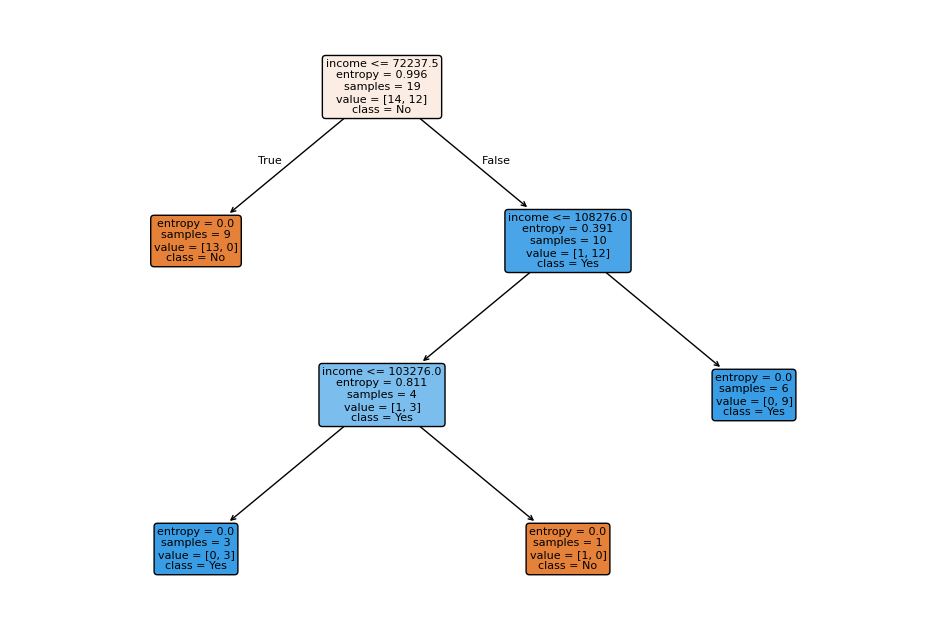

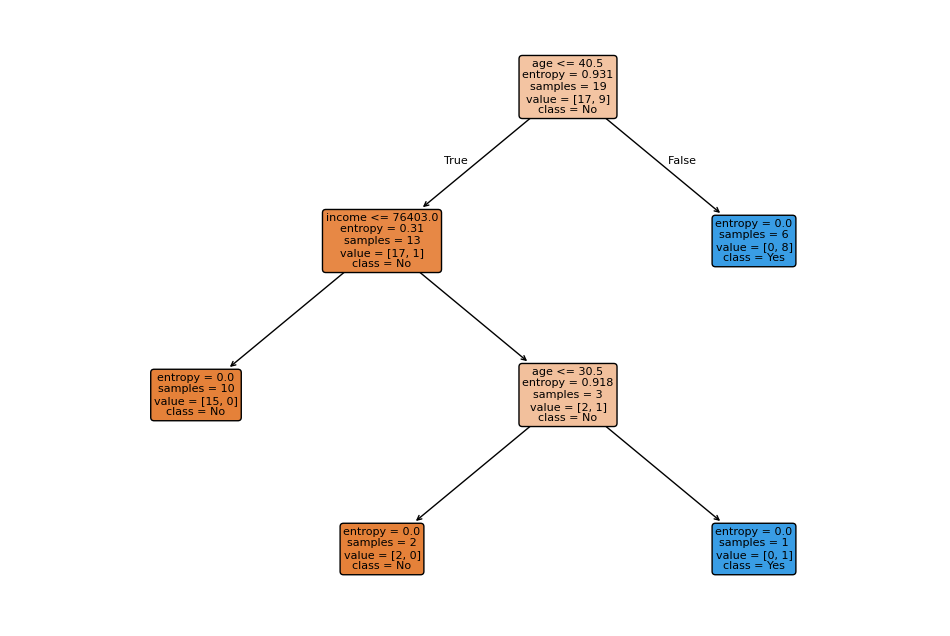

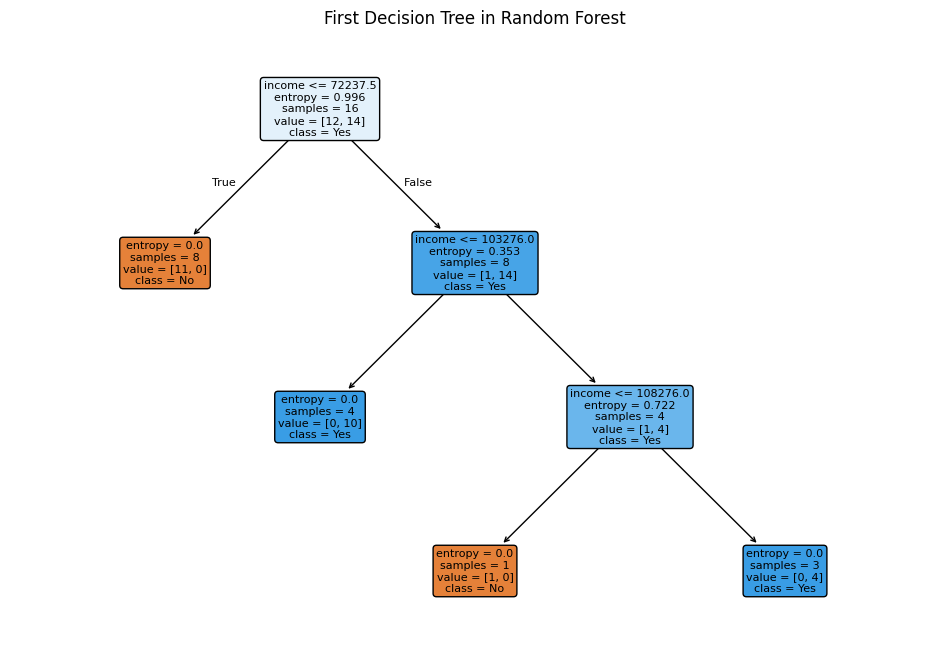

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree


data = pd.read_csv('Ex 3.csv')
print("Dataset preview:")
print(data.head())


x = data[["age", "income"]]
y = data["bought"]
print(x)

xtr, xte, ytr, yte = train_test_split(x, y, test_size=1/3, random_state=0)

rf_model = RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=1, n_jobs=2)

rf_model.fit(xtr, ytr)

tepr = rf_model.predict(xte)
trpr = rf_model.predict(xtr)

print("Predictions on test set:", tepr.tolist())

accuracy = accuracy_score(yte, tepr)
print("Accuracy:", accuracy)

cm = confusion_matrix(yte, tepr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Bought (0)", "Bought (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Accuracy={accuracy:.2f})")
plt.show()
for i in range(3):
    plt.figure(figsize=(12,8))
    plot_tree(
    rf_model.estimators_[i],
    feature_names=x.columns,
    class_names=["No", "Yes"],
    filled=True,
    fontsize=8,
    rounded=True)
plt.title("First Decision Tree in Random Forest")
plt.show()